$\Huge{\text{Física Computacional}}$

# Tema 5: Soluciones de ecuaciones.

## 5.3 Ecuaciones no lineales.

### 5.3.4 Método de Newton-Raphson.

- Tanto el método del punto fijo como el de la bisección son rápidos y simples, pero tienen inconvenientes. 

- El método del punto fijo o relajación no siempre converge a la solución. 

- El método de la bisección requiere definir un intervalo inicial que contenga la raíz de la función.



- El método de Newton-Raphson es incluso más rápido que los dos anteriores. 

- Consiste al igual que el método de la bisección en buscar una solución a la ecuación

$$f(x)=0,$$

$\quad$ es decir, en buscar las raices de la función. las cuales se estiman extrapolando la pendiente de la función en un punto dado.



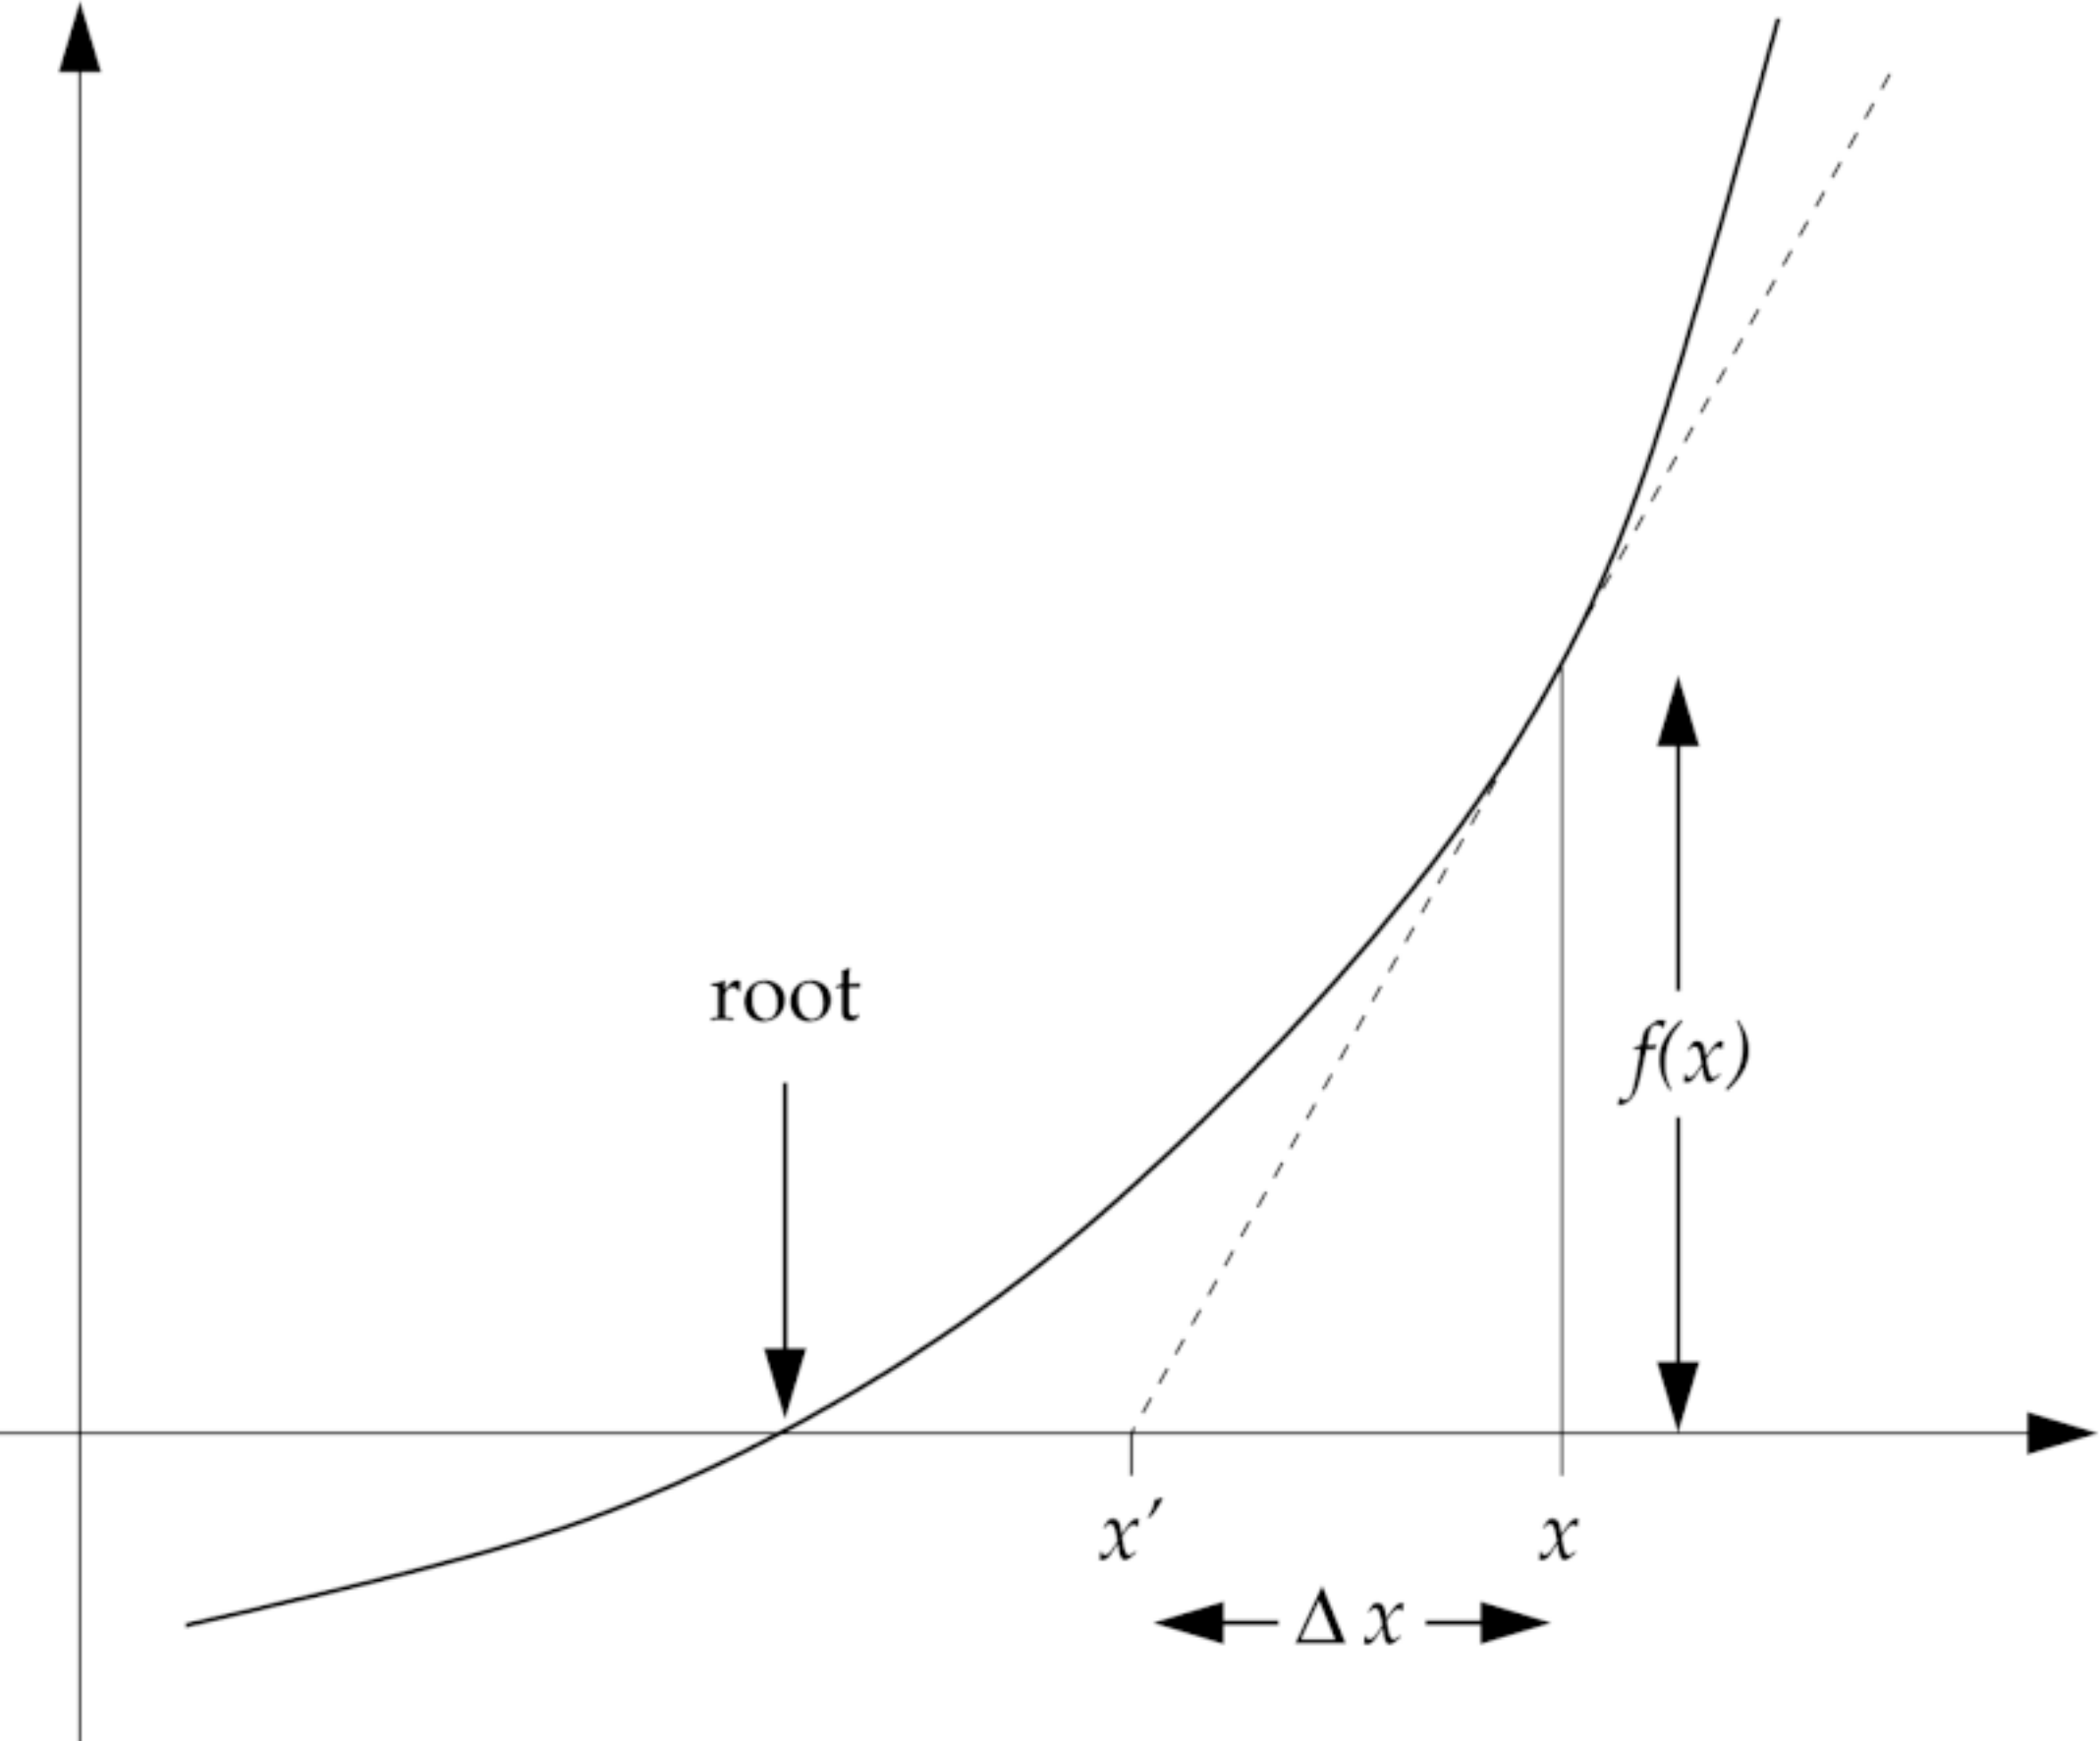

In [34]:
display(Image("newton.png",width=600,height=600))

- Dada una estimación incial $x$ la nueva estimación viene dada por:

$$x'=x-\Delta x = x-\frac{f(x)}{f'(x)},$$

$\quad$ que por tanto requiere conocer la derivada de la función. 

- Repitiendo iterativamente el procedimiento se obtiene (de forma general) una estimación mejor y mejor de la raíz. 

#### Error y convergencia del método de Newton-Raphson

- Para estimar el error del método de Newtosn-Raphson, sólo tenemos que expandir una vez más en serie de Taylor.

- Llamando $\bar x$ a la solución exacta a la ecuación y $x$ a una estimación dada, tenemos:

$$f(\bar x)=f(x)+(\bar x -x)\,f'(x)+\frac{1}{2}(\bar x-x)^2\,f''(x)+\cdots =0.$$


- Despejando, se obtiene:

$$\bar x=x-\frac{f(x)}{f'(x)}-\frac{1}{2}(\bar x-x)^2\frac{f''(x)}{f'(x)}+\cdots=x'-\frac{1}{2}(\bar x-x)^2\frac{f''(x)}{f'(x)}+\cdots$$

$\quad$ siendo $x'$ la nueva estimación que se obtiene a partir de $x$ usando el método de Newton-Raphson.

- Esto implica que nuestra raíz se diferenciará de la nueva estimación con un error:

$$\epsilon=\bar x-x'=\frac{-1}{2}(\bar x-x)^2\frac{f''(x)}{f'(x)}.$$

- De la misma forma el error de la nueva estimación $x'$ será:

$$\epsilon'=\bar x-x''=\frac{-1}{2}(\bar x-x')^2\frac{f''(x')}{f'(x')}=\frac{1}{2}\frac{f''(x')}{f'(x')}\epsilon^2,$$

$\quad$ el error tiene una convergencia cuadrática.

- Esto implica que converge mucho más rapidamente que el método del punto fijo y de la bisección.   
  Asumiendo que el cociente f''(x)/f'(x)=k es aproximadamente constante cuando uno esta cerca de  la raíz se obtiene que después de $N$ iteracciones


$$\epsilon_N\simeq \frac{2}{k}\left(\frac{k}{2}\epsilon_0\right)^{2^N},$$


$\quad$ es decir, el error varia con $N$ como la exponencial de una exponencial.

- Por tanto, la diferencia entre dos estimaciones sucesivas será:

$$x'-x=\epsilon -\frac{k}{2}\epsilon^2=\epsilon\left(1-\frac{k}{2}\epsilon\right)\simeq \epsilon,$$

$\quad$ siempre y cuando $\epsilon$ sea pequeño.


- Así, la estimación del error $\epsilon$ para un valor $x$, viene dado por la diferencia con lo estimación siguiente $x'-x$.
-  Por tanto, para implementar el método de Newton-Raphson iteramos la fórmula de la aproximación hasta que la diferencia entre dos valores sucesivos sea comparable o más pequeña que la precisión deseada.


#### Desventajas del método de Newton-Raphson.

- Necesitamos conocer la derivada de $f(x)$.

- El método no siempre converge:  
  por ejemplo si $f'(x)$ es muy pequeña, el método iterativo hará que el error de cada iteracción sea mayor que en la anterior.
- Puede ocurrir que la pendiente de la función apunte en el sentido contrario de la raíz.


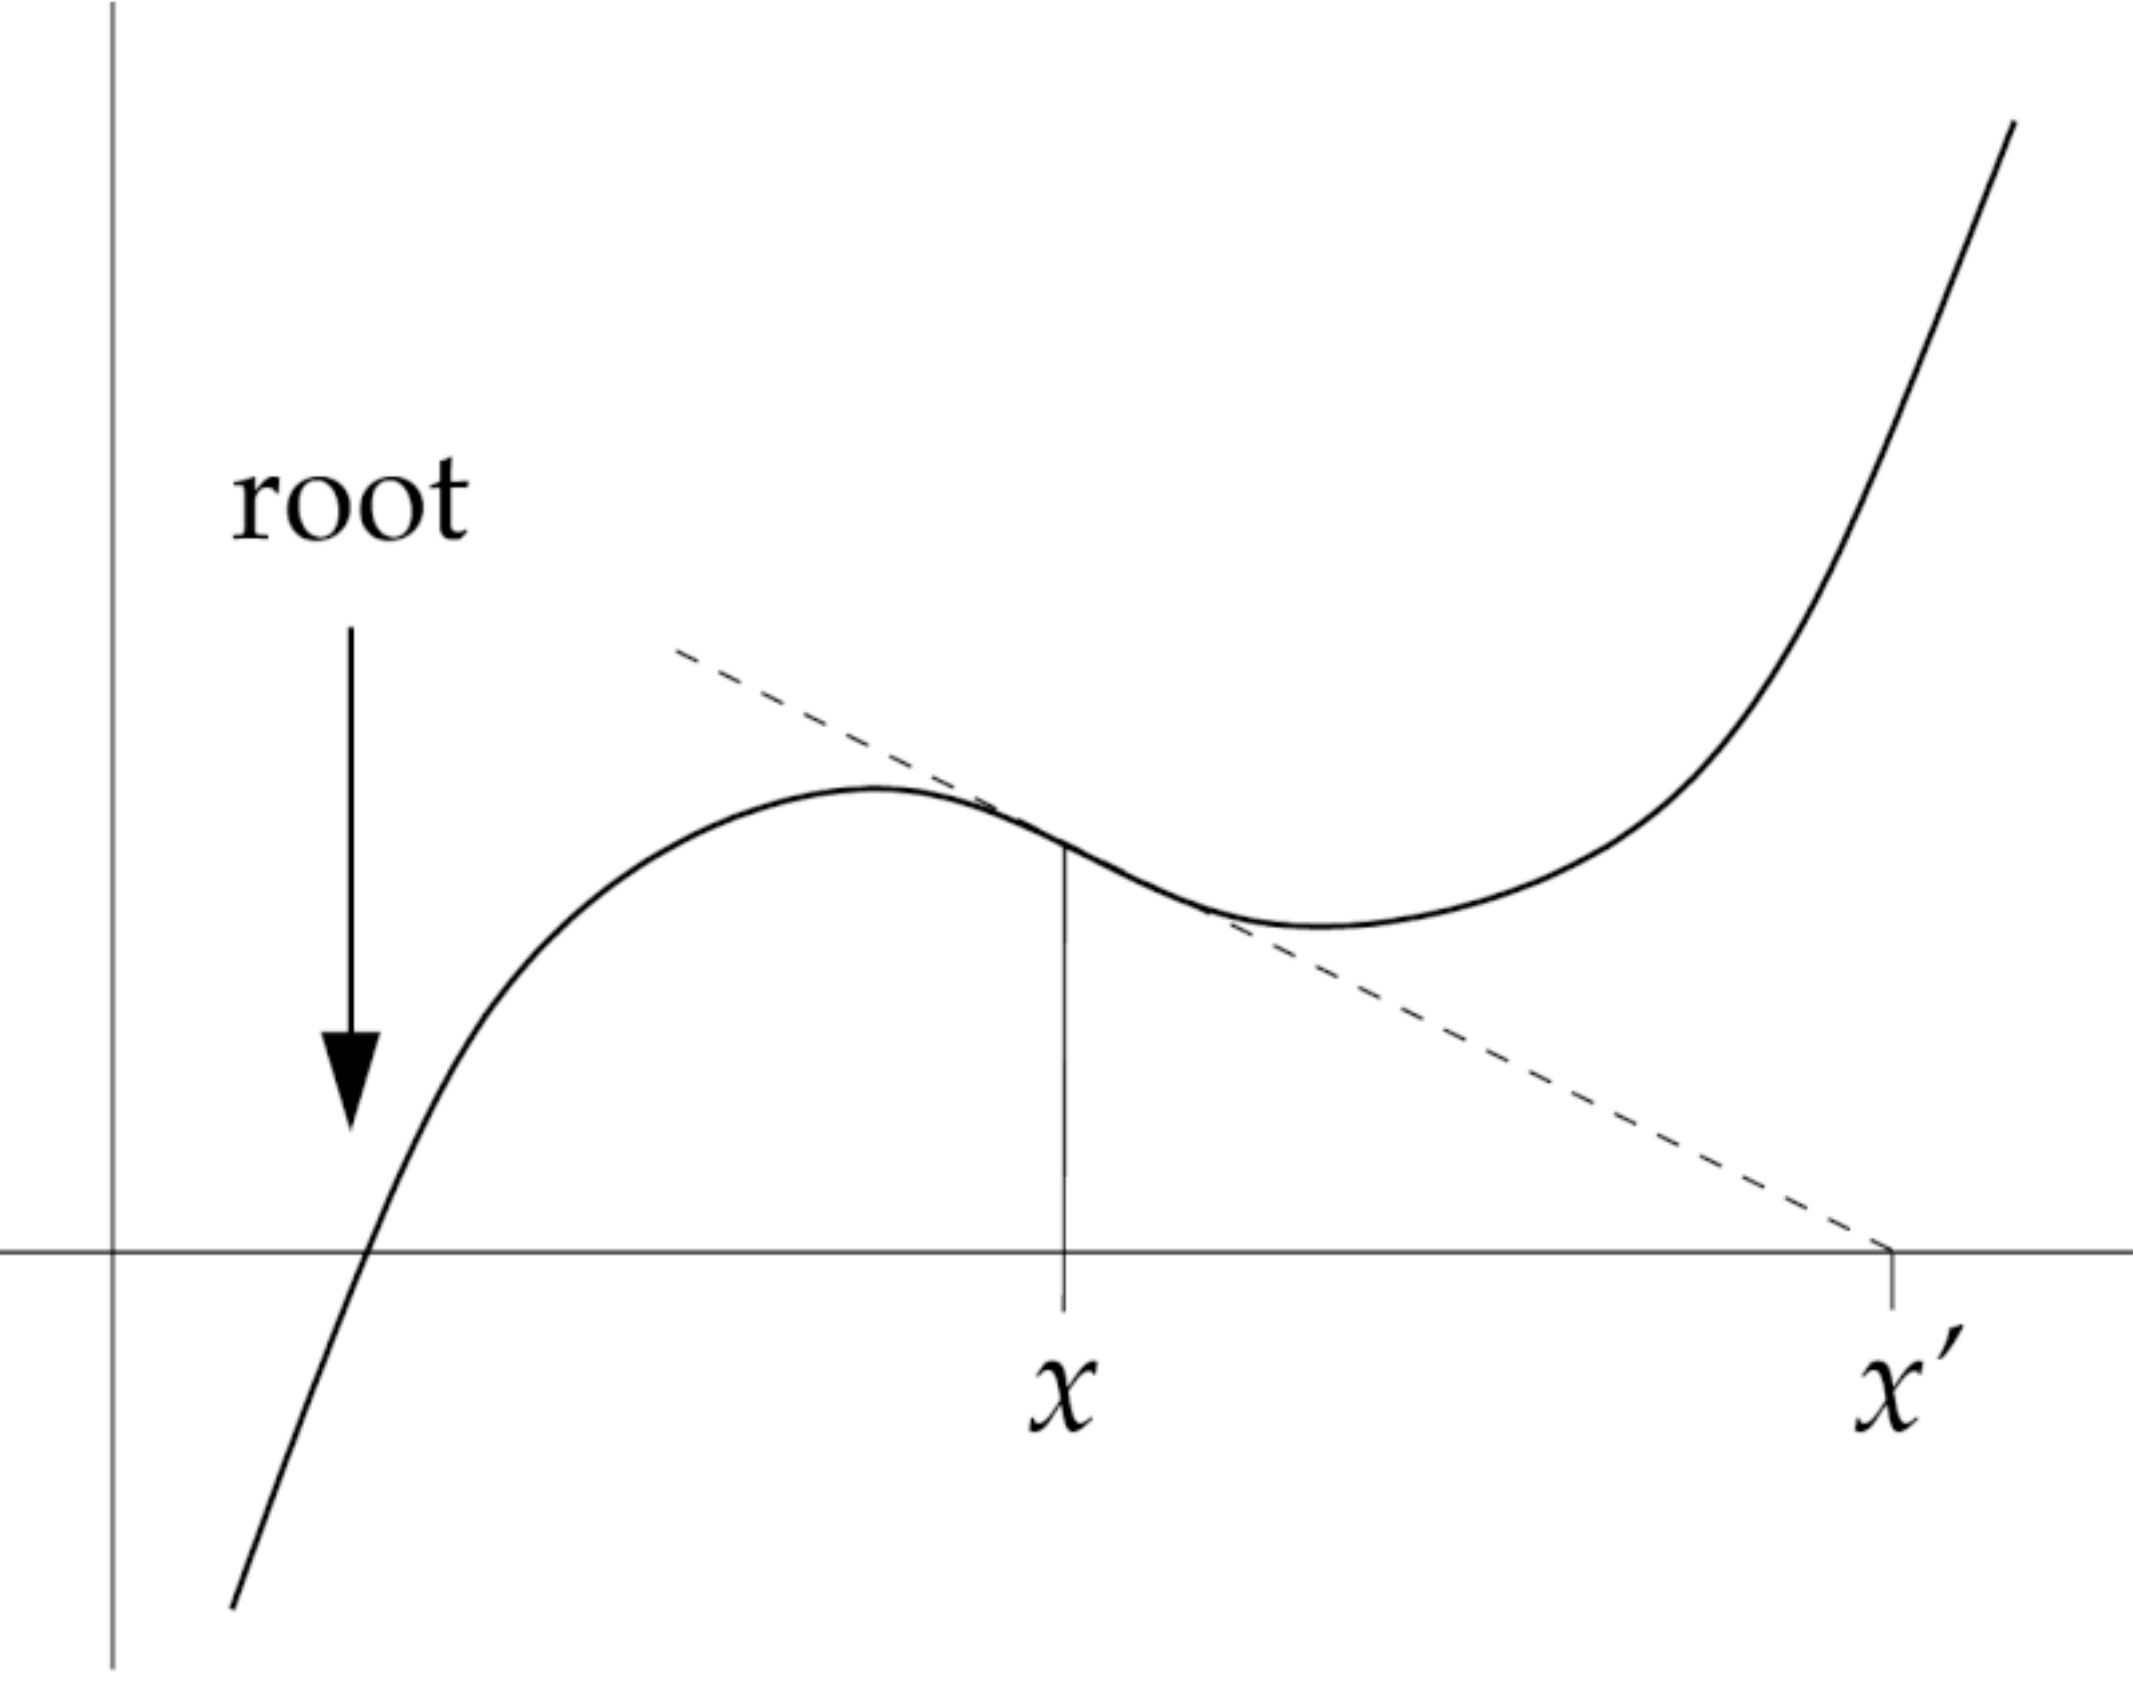

In [35]:
display(Image("newton2.png",width=600,height=600))

**Nota: cada método tiene sus ventajas e inconvenientes.**     
Lo importante es disponer de métodos diferentes para utilizar en cada caso el más adecuado, dependiendo del problema concreto.

**Ejercicio 5.23: Visualizando el método de Newton-Raphson**

Encontrar la raíz de la función:

$$f(x)=\text{e}^x-2,$$

usando el método de Newton-Rapshon con una precisión mayor de $10^{-6}$.

Hemos necesitado 5 iteracciones.


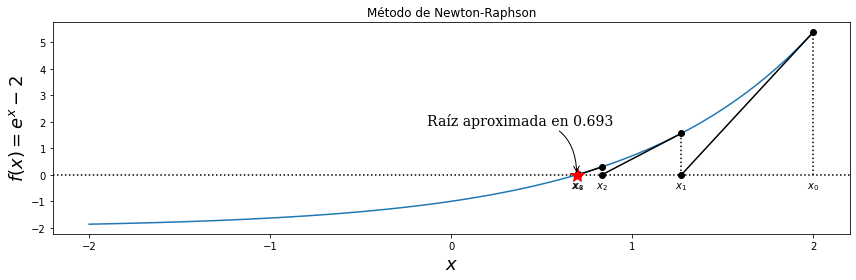

In [37]:
from numpy import exp,linspace
from matplotlib.pyplot import subplots,plot,show

# Definimos nusetra función

def f(x):
    return exp(x)-2

# Definimos su derivada

def fp(x):
    return exp(x)

x=linspace(-2,2,100)
fig,ax=subplots(1,1,figsize=(12, 4)) # subplots(#filas,#columas) 
                                     # nos permite crear varias gráficas en una sólo llamada.
                                     # y cambiar facilmente sus propiedades    
ax.plot(x,f(x),lw=1.5)
ax.axhline(0,ls=':',color="k")
ax.set_xticks([-2, -1, 0, 1, 2])
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x) = e^x - 2$', fontsize=18)

# Aplicamos el método de newton hasta que nuestro error sea menor que la precisión

eps=1e-6    # Precisión deseada
it = 0      # Número de iteracciones
x1=2        # Estimación inicial. Sabemos que la función es creciente. 
            # Empezamos en el límite superior del intervalo

while f(x1)>eps:
    x2 =x1-f(x1)/fp(x1)
    ax.plot(x1,f(x1),'ko')
    ax.plot(x2,0,'ko')
    ax.plot([x1,x1],[0,f(x1)],color='k',ls=':')
    ax.text(x1,-.5, r'$x_%d$' %it,ha='center')
    ax.plot([x1,x2], [f(x1), 0], 'k-')
    x1=x2
    it+=1

print("Hemos necesitado",it,"iteracciones.")
ax.plot(x1, f(x1), 'r*', markersize=15)
ax.annotate("Raíz aproximada en %.3f" %x1,fontsize=14, family="serif", xy=(x1,f(x1)), xycoords='data',
xytext=(-150, +50), textcoords='offset points',arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=-.5"))

ax.set_title("Método de Newton-Raphson")
fig.tight_layout()
show()

**Ejericio 5.24: Función arcotangente hiperbólica.**

Utilizar el método de Newton para calcular la arcotangente hiperbólica de un número u:

$$x=\text{arctanh} \, u\;\Longrightarrow\; u=\tanh\,x.$$

Representar la arctanh en el intervalo (-1,1).

* Dado un valor $u$, el enunciado nos esta pidiendo calcular la raíz de la ecuación:

$$f(x)=\tanh x-u=0.$$

- Teniendo en cuenta que:

$$f'(x)=\cosh^{-2}\,x,$$

$\quad$ dada una estimación incial $x_0$ la siguiente estimación de la raíz usando el método de Newton-Raphson será:

$$x'=x-\frac{f(x)}{f'(x)}=x-(\tanh\,x-u)\cosh^2\,x.$$

In [5]:
from numpy import tanh,cosh

def arctanh(u,eps):
    x = 0.0
    err = 1.0

    while abs(err)>eps:
        err = (tanh(x)-u)*cosh(x)**2
        x -= err
    return x

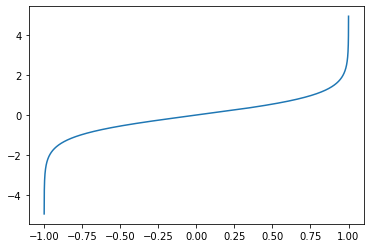

In [10]:
from numpy import linspace
from matplotlib.pyplot import plot,show

upoints = linspace(-0.9999,0.9999,10000)
xpoints = []

for u in upoints:
    xpoints.append(arctanh(u,1e-6))

plot(upoints,xpoints)
show()

**Ejericio 5.25: Las raices de un polinomio.**

Dado el polinomio de grado 6

$$P(x)=924\,x^6-2772\,x^5+3150 x^4-1680\,x^3+420\,x^2-42\,x+1,$$

1. Representarlo en el intervalo (0,1) y encontrar aproximadamente la posición de las 6 raices. 

2. Escribir un programa que las calcule con una precisión mayor de $10^{-12}$ usando el método de Newton.

### 5.3.5 Método de la secante.

- Una de las limitaciones del método de Newton-Raphson es que debemos conocer la derivada de $f(x)$.

- Si no es el caso, aún la podemos estimar numericamente usando las técnicas estudiadas en el Tema 3,  
  que es lo que llamamos el método de la secante.

- Para calcularla, necesitamos como mínimo puntos $x_1$ y $x_2$ que a difrencia del método de la bisección, no tienen que contener a la raíz. 
- Con ellos calculamos la aproximación de la derivada:

$$f'(x_2)=\frac{f(x_2)-f(x_1)}{x_2-x_1}.$$

$\quad$ lo cual nos permite obtener una nueva estimación de la raiz:

$$x_3=x_2-f(x_2)\frac{\left(x_2-x_1\right)}{f(x_2)-f(x_1)},$$

$\quad$ que como se puede ver depende de las dos estimaciones anteriores.

- Al igual que el método de Newton-Raphson, converge muy rápidamente a la solución, y tiene sus misma limitaciones. 

**Ejericio 5.26: El punto de Lagrange Tierra-Luna.**

El punto de Lagrange del sistema Tierra-Luna esta definido como aquel que siempre se encuentra a la misma distancia entre ambos.   
Es decir, aquel punto en el que un satélite orbitaria en torno a la Tierra en perfecta sincronía con la Luna.  
Esto se debe a que la atracción gravitatoria en ese punto debido a la Tierra y la Luna se combinan para crear la fuerza centripeta que mantiene al satélite en una órbita constante. 

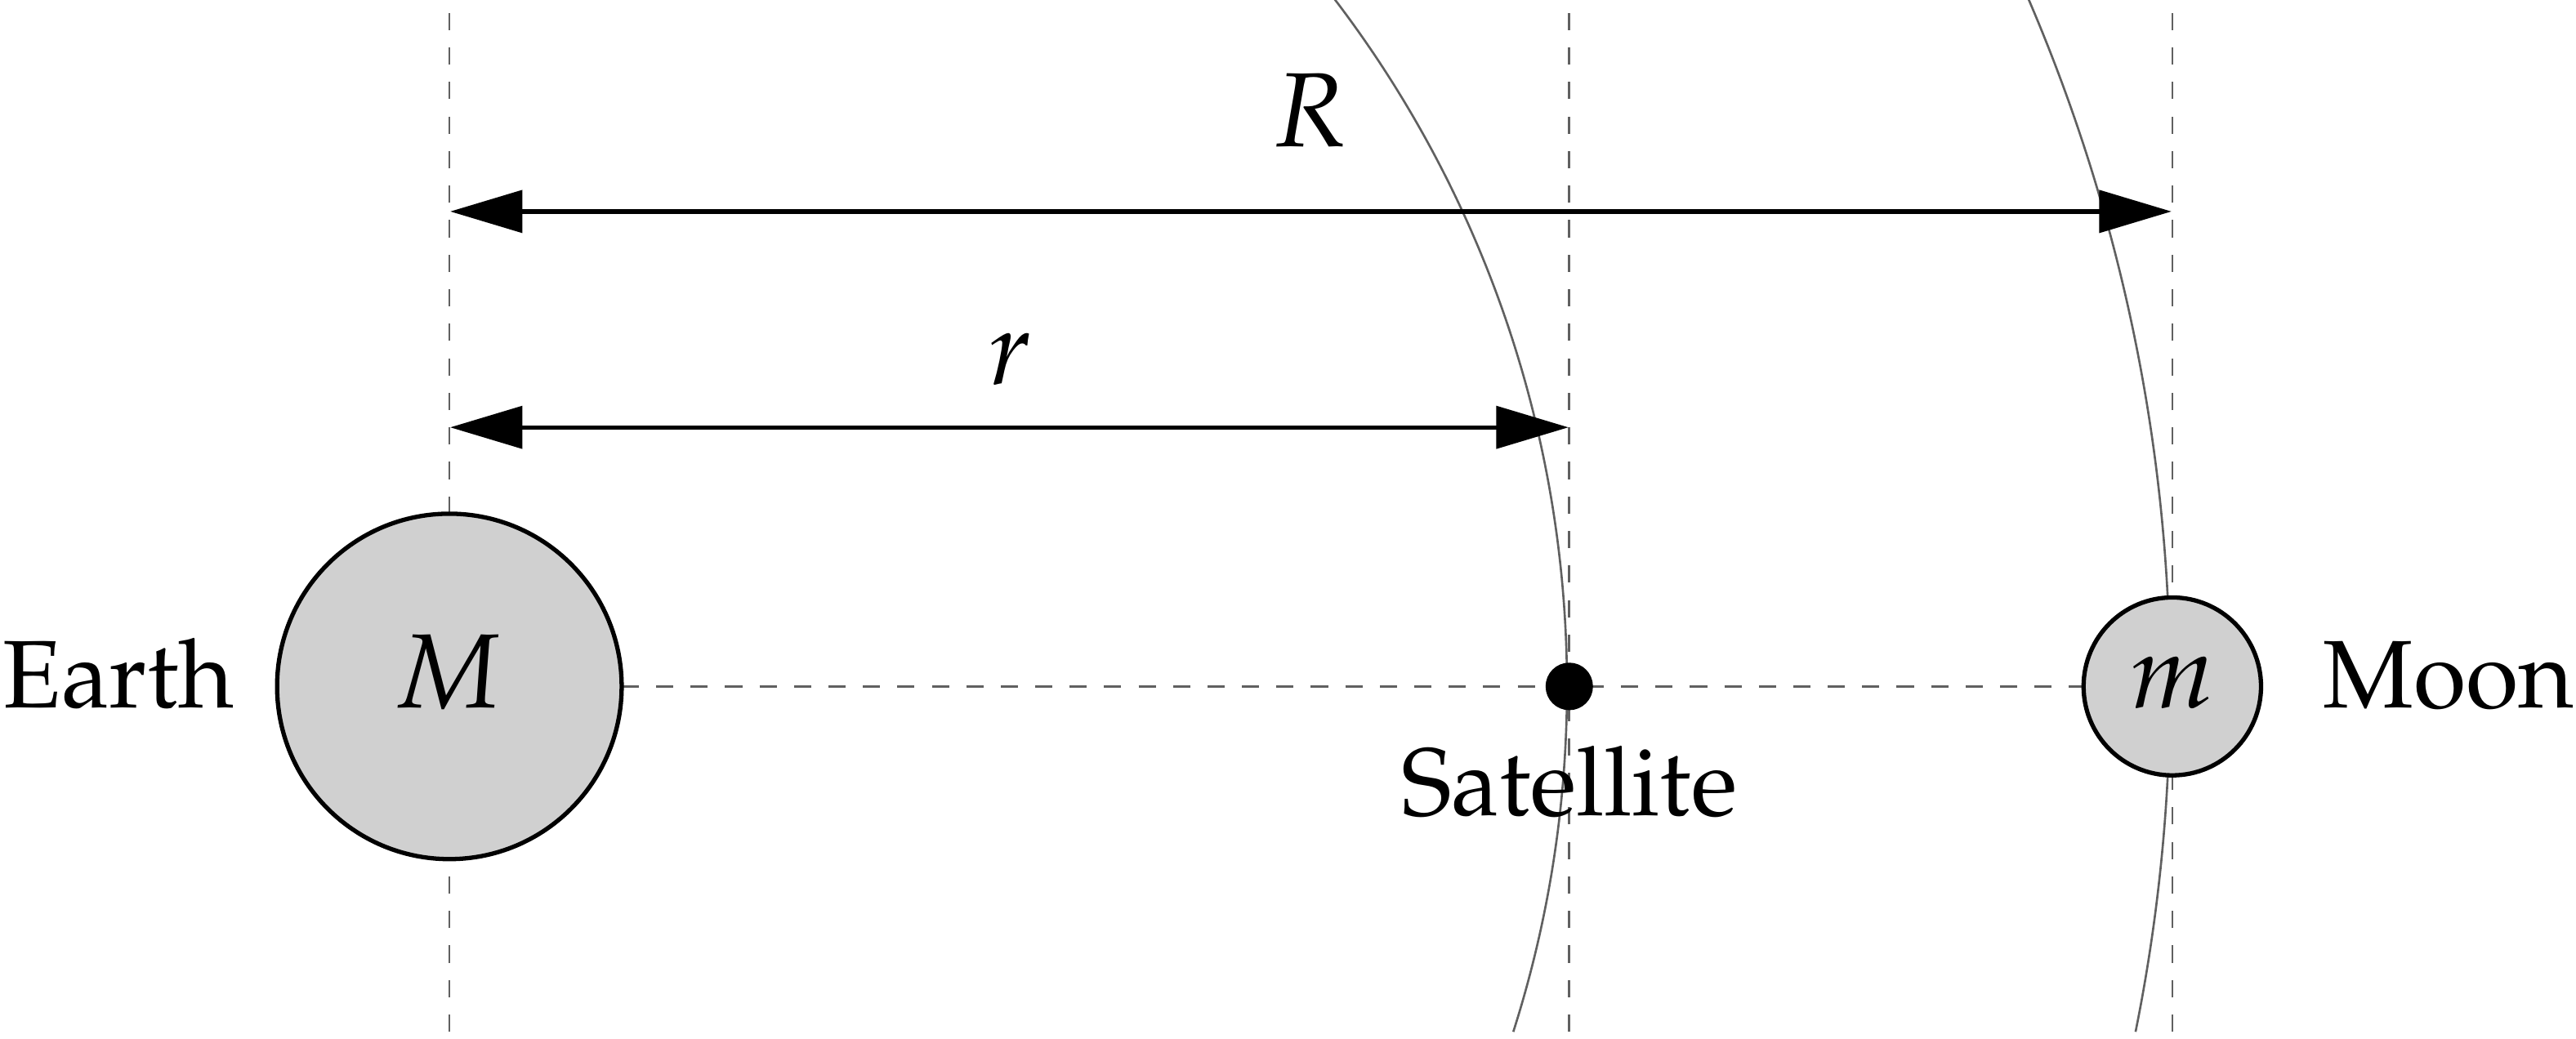

In [70]:
from IPython.display import Image,display
display(Image("Lagrange-point.png",width=600,height=600))

1. Asumiendo una orbita circular, probar que la distancia $r$ desde el centro de la tierra al punto de Lagrange $L$ satisface:

$$\frac{G\,M}{r^2}-\frac{G\,m}{\left(R-r\right)^2}=\omega^2 r,$$

$\quad$ siendo $R$ la distancia entre la Tierra y la Luna, $M$  la masa de la Tierra, $m$ la de la Luna, $G$ la constante de la gravitación,   
$\quad$ y $\omega$ la velocidad angular del satélite (que tiene que ser igual a la de la Luna).

2. La ecuación anterior es un polinomio de grado 5. Escribir un programa que use el método de Newton y el de la secante para obtener el valor de $r$ con una  precisión de $10^{-6}$.

   Los valores de los diferentes parámetros del problema son:
   
   $G=6.674\times 10^{-11}$ N m$^2$ Kg$^{-1}$,  
   $M=5.974\times 10^{24}$ Kg,  
   $m=7.348\times 10^{22}$ Kg,  
   $R=3.844\times 10^{8}$ m,   
   $v=1.023$ Km/s, 
   
   siendo $v$ la velocidad con la que la Luna se desplaza en su orbita. 

1. La fuerza total $F$ sobre el satélite de masa $\mu$ es el punto de Langrange Tierra-Luna será

$$F=\frac{GM\mu}{r^2}-\frac{Gm\mu}{\left(R-r\right)^2},$$

$\quad$ que tiene que producir un movimiento circular uniforme con velocidad orbital $\omega$, cuyas coordenadas vienen dadas por:

$$\vec x=r(\cos\phi,\sin\phi),$$

$\quad$ siendo $\phi$ el ángulo de giro. Como el sátelite se mueve en una órbita circular uniforme:

$$\omega=\displaystyle\frac{\text{d}\phi}{\text{d}t}=\frac{\phi}{t}\;\Rightarrow\;\phi=\omega\,t.$$

- Derivando dos veces:

$$\vec v=r\,\omega\,(-\sin\omega\,t,\cos\omega\,t),\quad \vec a=-r\,\omega^2\,(\cos\omega\,t,\sin\omega\,t),$$

$\quad$ por lo que la aceleración en la dirección radial es:  $r\omega^2$.

- La segunda ley de Newton impone por tanto que:

$$F=\mu\,\omega^2\,r,$$

$\quad$ que al dividir por $\mu$ lleva a la ecuación del enunciado.

In [95]:
# 2.  Calculamos el valor de R usando el método de Newton y la secante. 

# Definimos las constantes del problema

G=6.674e-11
M=5.974e24
m=7.348e22
R=3.844e8
v=1.023e3
w=v/R

# definimos nuestra función

def f(r):
    return G*M/r**2-G*m/(R-r)**2-w**2*r

# definimos su derivada

def fp(r):
    return -2*G*M/r**3-2*G*m/(R-r)**3-w**2

# empezamos con Newton-Raphson

eps=1e-6
r1=0.9999*R    # estimación inicial
err=1

while err>eps:
    err=f(r1)/fp(r1)
    r1-=err

print("La distancia al punto L1 con el método de Newton-Raphson es de %0.8e" %(r1/1000),"Km.")

# Método de la secante

# Definimos dos estimaciones iniciales 

r1=0.00001*R
r2=0.99999*R
f2=f(r1)

while abs(r1-r2)>eps:
    f1,f2=f2,f(r2)
    r1,r2=r2,r2-f2*(r2-r1)/(f2-f1)
    
print("La distancia al punto L1 con el método de la secante es de %0.8e" %(r1/1000),"Km.")

La distancia al punto L1 con el método de Newton-Raphson es de 3.26060572e+05 Km.
La distancia al punto L1 con el método de la secante es de 3.26060572e+05 Km.


### 5.3.5 Método de Newton-Raphson para más de una variable.

- Sea un conjunto de $N$ ecuaciones no-lineales para N variables $x_1\cdots,x_N$

\begin{align}
f_1(x_1,\cdots,x_N)=&\;0\,,\nonumber\\
f_2(x_1,\cdots,x_N)=&\;0\,,\nonumber\\
\vdots\quad\quad\quad &\;\vdots\nonumber\\
f_N(x_1,\cdots,x_N)=&\;0\,,\nonumber\\
\end{align}

$\quad$ cuyas raices con $\bar x_1,\cdots,\bar x_N$.

- Expandiendo cada una de las ecuaciones en serie de Taylor:

$$f_i(\bar x_1,\cdots,\bar x_N)=f_i(x_1,\cdots,x_N)+\sum_j{\left(\bar x_j-x_j\right)}\frac{\partial f_i}{\partial x_j}+\cdots,$$

$\quad$ que en notacion vectorial se puede expresar como

$$F(\bar x)=F(x) + J\cdot(\bar X- X)+\cdots,$$

$\quad$ siendo $J$ la matriz jacobiana del sistema de ecuaciones, es decir la matriz $N\times N$ con elementos $J_{ij}=\frac{\partial f_i}{\partial x_j}$.

- Puesto que el vector $\bar X$ es solución del sistema, se tiene que $F(\bar x)=0$, y

$$J\cdot(X-\bar X)=J\cdot\Delta X=F(x),$$

$\quad$ es exactamente la generalización del método de Newton-Raphson para más de una variable,   
$\quad$ que se puede resolver con los métodos que hemos visto para sistemas de ecuaciones lineales. 

- Una vez que hemos obtenido $\Delta X$, podemos obtener la nueva estimación a partir de:

$$X'=X-\Delta X.$$



- En el caso de que la matriz Jacobiana no sea conocida, se puede estimar por medio del método de las derivadas finitas, que generaliza por tanto el método de la secante para más de una variable.

**Ejericio 5.27: Representación gráfica del método de Newton-Raphson en varias variables.**

Resolver el sistema de ecuaciones:

\begin{align}
y - x^3 - 2\,x^2 + 1\,=&\;0,\nonumber\\
y + x^2 - 1\,=&\;0,\nonumber\\
\end{align}

usando el método de Newton-Raphson en varias variables.


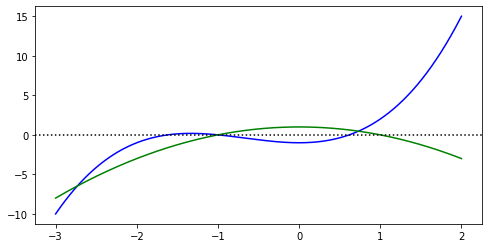

In [137]:
from numpy import linspace
from matplotlib.pyplot import subplots,plot,show,axhline

# definimos nuestro sistema de ecuaciones

def f(x):
    return [x[1] - x[0]**3 - 2 * x[0]**2 + 1, x[1] + x[0]**2 - 1]


# definimos el jacobiano del sistema

def fJ(x):
    return [[- 3*x[0]**2 - 4*x[0],1],[ 2*x[0],1]]

# representamos nuestra dos curvas

x=linspace(-3, 2, 5000)
y1=x**3+2*x**2-1
y2=-x**2+1

fig,ax=subplots(figsize=(8,4))
ax.plot(x,y1,'b',lw=1.5, label=r'$y = x^3 + 2x^2 - 1$')
ax.plot(x,y2,'g',lw=1.5, label=r'$y = -x^2 + 1$')
axhline(0,ls=':',color="k")
show()

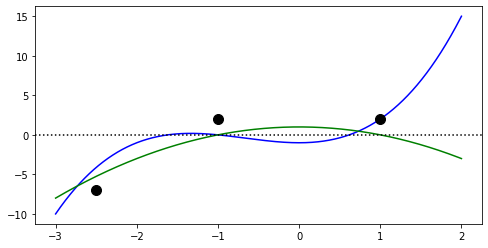

In [138]:
from numpy import array
# Obtenemos de ahí las estimaciones inciales:

x0=array([[-2.5, -7],[-1, 2],[1, 2]],float)

fig,ax=subplots(figsize=(8,4))
ax.plot(x,y1,'b',lw=1.5, label=r'$y = x^3 + 2x^2 - 1$')
ax.plot(x,y2,'g',lw=1.5, label=r'$y = -x^2 + 1$')
axhline(0,ls=':',color="k")

for i in x0:    
    ax.plot(i[0],i[1],'ko',markersize=10)  
show()

In [139]:
# Aplicamos el método de Newton Rapshon
from numpy import copy
from numpy.linalg import solve

eps=1e-6
x1=copy(x0)
it=0
for i in x1:
    err=1
    while err>eps:
        dx=solve(fJ(i),f(i))
        i-=dx
        err=abs(max(dx))
    x1[it]=i
    it+=1    

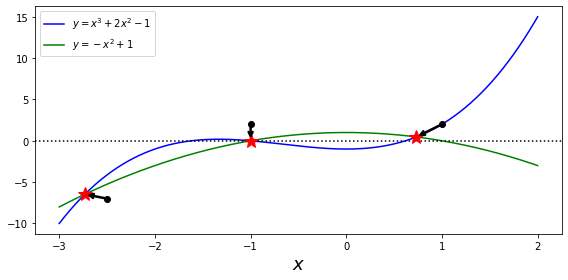

In [140]:
# Lo representamos

fig,ax=subplots(figsize=(8,4))
ax.plot(x,y1,'b',lw=1.5, label=r'$y = x^3 + 2x^2 - 1$')
ax.plot(x,y2,'g',lw=1.5, label=r'$y = -x^2 + 1$')
axhline(0,ls=':',color="k")

for k in range(3):
        
    ax.plot(x1[k,0],x1[k,1],'r*', markersize=15)
    ax.plot(x0[k,0],x0[k,1], 'ko')
    ax.annotate("", xy=(x1[k,0],x1[k,1]), xytext=(x0[k,0],x0[k,1]),
    arrowprops=dict(arrowstyle="->", linewidth=2.5))

ax.legend(loc=0)
ax.set_xlabel(r'$x$',fontsize=18)
fig.tight_layout()
show()

- Obviamente el método de Newton-Raphson para sistemas de ecuaciones no lineales ya esta implementado.
- Consiste en la función optimize del módulo scipy

In [147]:
from scipy import optimize

sol1=optimize.fsolve(f,x0[0])
sol2=optimize.fsolve(f,x0[1])
sol3=optimize.fsolve(f,x0[2])

print(sol1,x1[0])
print(sol2,x1[1])
print(sol3,x1[2])

[-2.73205081 -6.46410162] [-2.73205065 -6.4641003 ]
[-1.00000000e+00 -8.07793567e-28] [-1.  0.]
[0.73205081 0.46410162] [0.73205095 0.46410184]


- Vamos a aplicarlo para ver que solución obtenemos dependiendo de las condiciones iniciales.

/home/jacobo/python/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


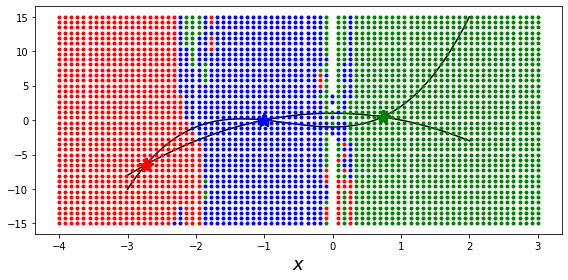

In [150]:
fig,ax=subplots(figsize=(8, 4))
ax.plot(x, y1, 'k', lw=1.5, label=r'$y = x^3 + 2x^2 - 1$')
ax.plot(x, y2, 'k', lw=1.5, label=r'$y = -x^2 + 1$')

colors = ['r', 'b', 'g']

for m in linspace(-4, 3, 80):
    for n in linspace(-15, 15, 40):
    
        x00=[m, n]
        sol=optimize.fsolve(f,x00)

        for idx,s in enumerate([sol1, sol2, sol3]):
            if abs(s-sol).max() < 1e-5:
                ax.plot(sol[0], sol[1], colors[idx]+'*', markersize=15)
                ax.plot(x00[0], x00[1], colors[idx]+'.')

ax.set_xlabel(r'$x$',fontsize=18)
fig.tight_layout()
show()

**Diferentes puntos iniciales en general llevan a diferentes soluciones**

**Ejericio 5.27: Sistema de circuitos no lineales.**

Mientras que las resistencias introducen un efecto lineal en la intensidad de corriente (Ley de Ohm), 

$$I=\Delta V/R,$$

los diodos obedecen una ecuación no lineal:

$$I=I_0\left(\text{e}^{\Delta V/V_T}-1\right),$$

siendo $V$ la diferencia de voltaje entre el diodo e $I_0$, $V_0$ parámetros dependientes de su composición.

Dado el siguiente circuito:

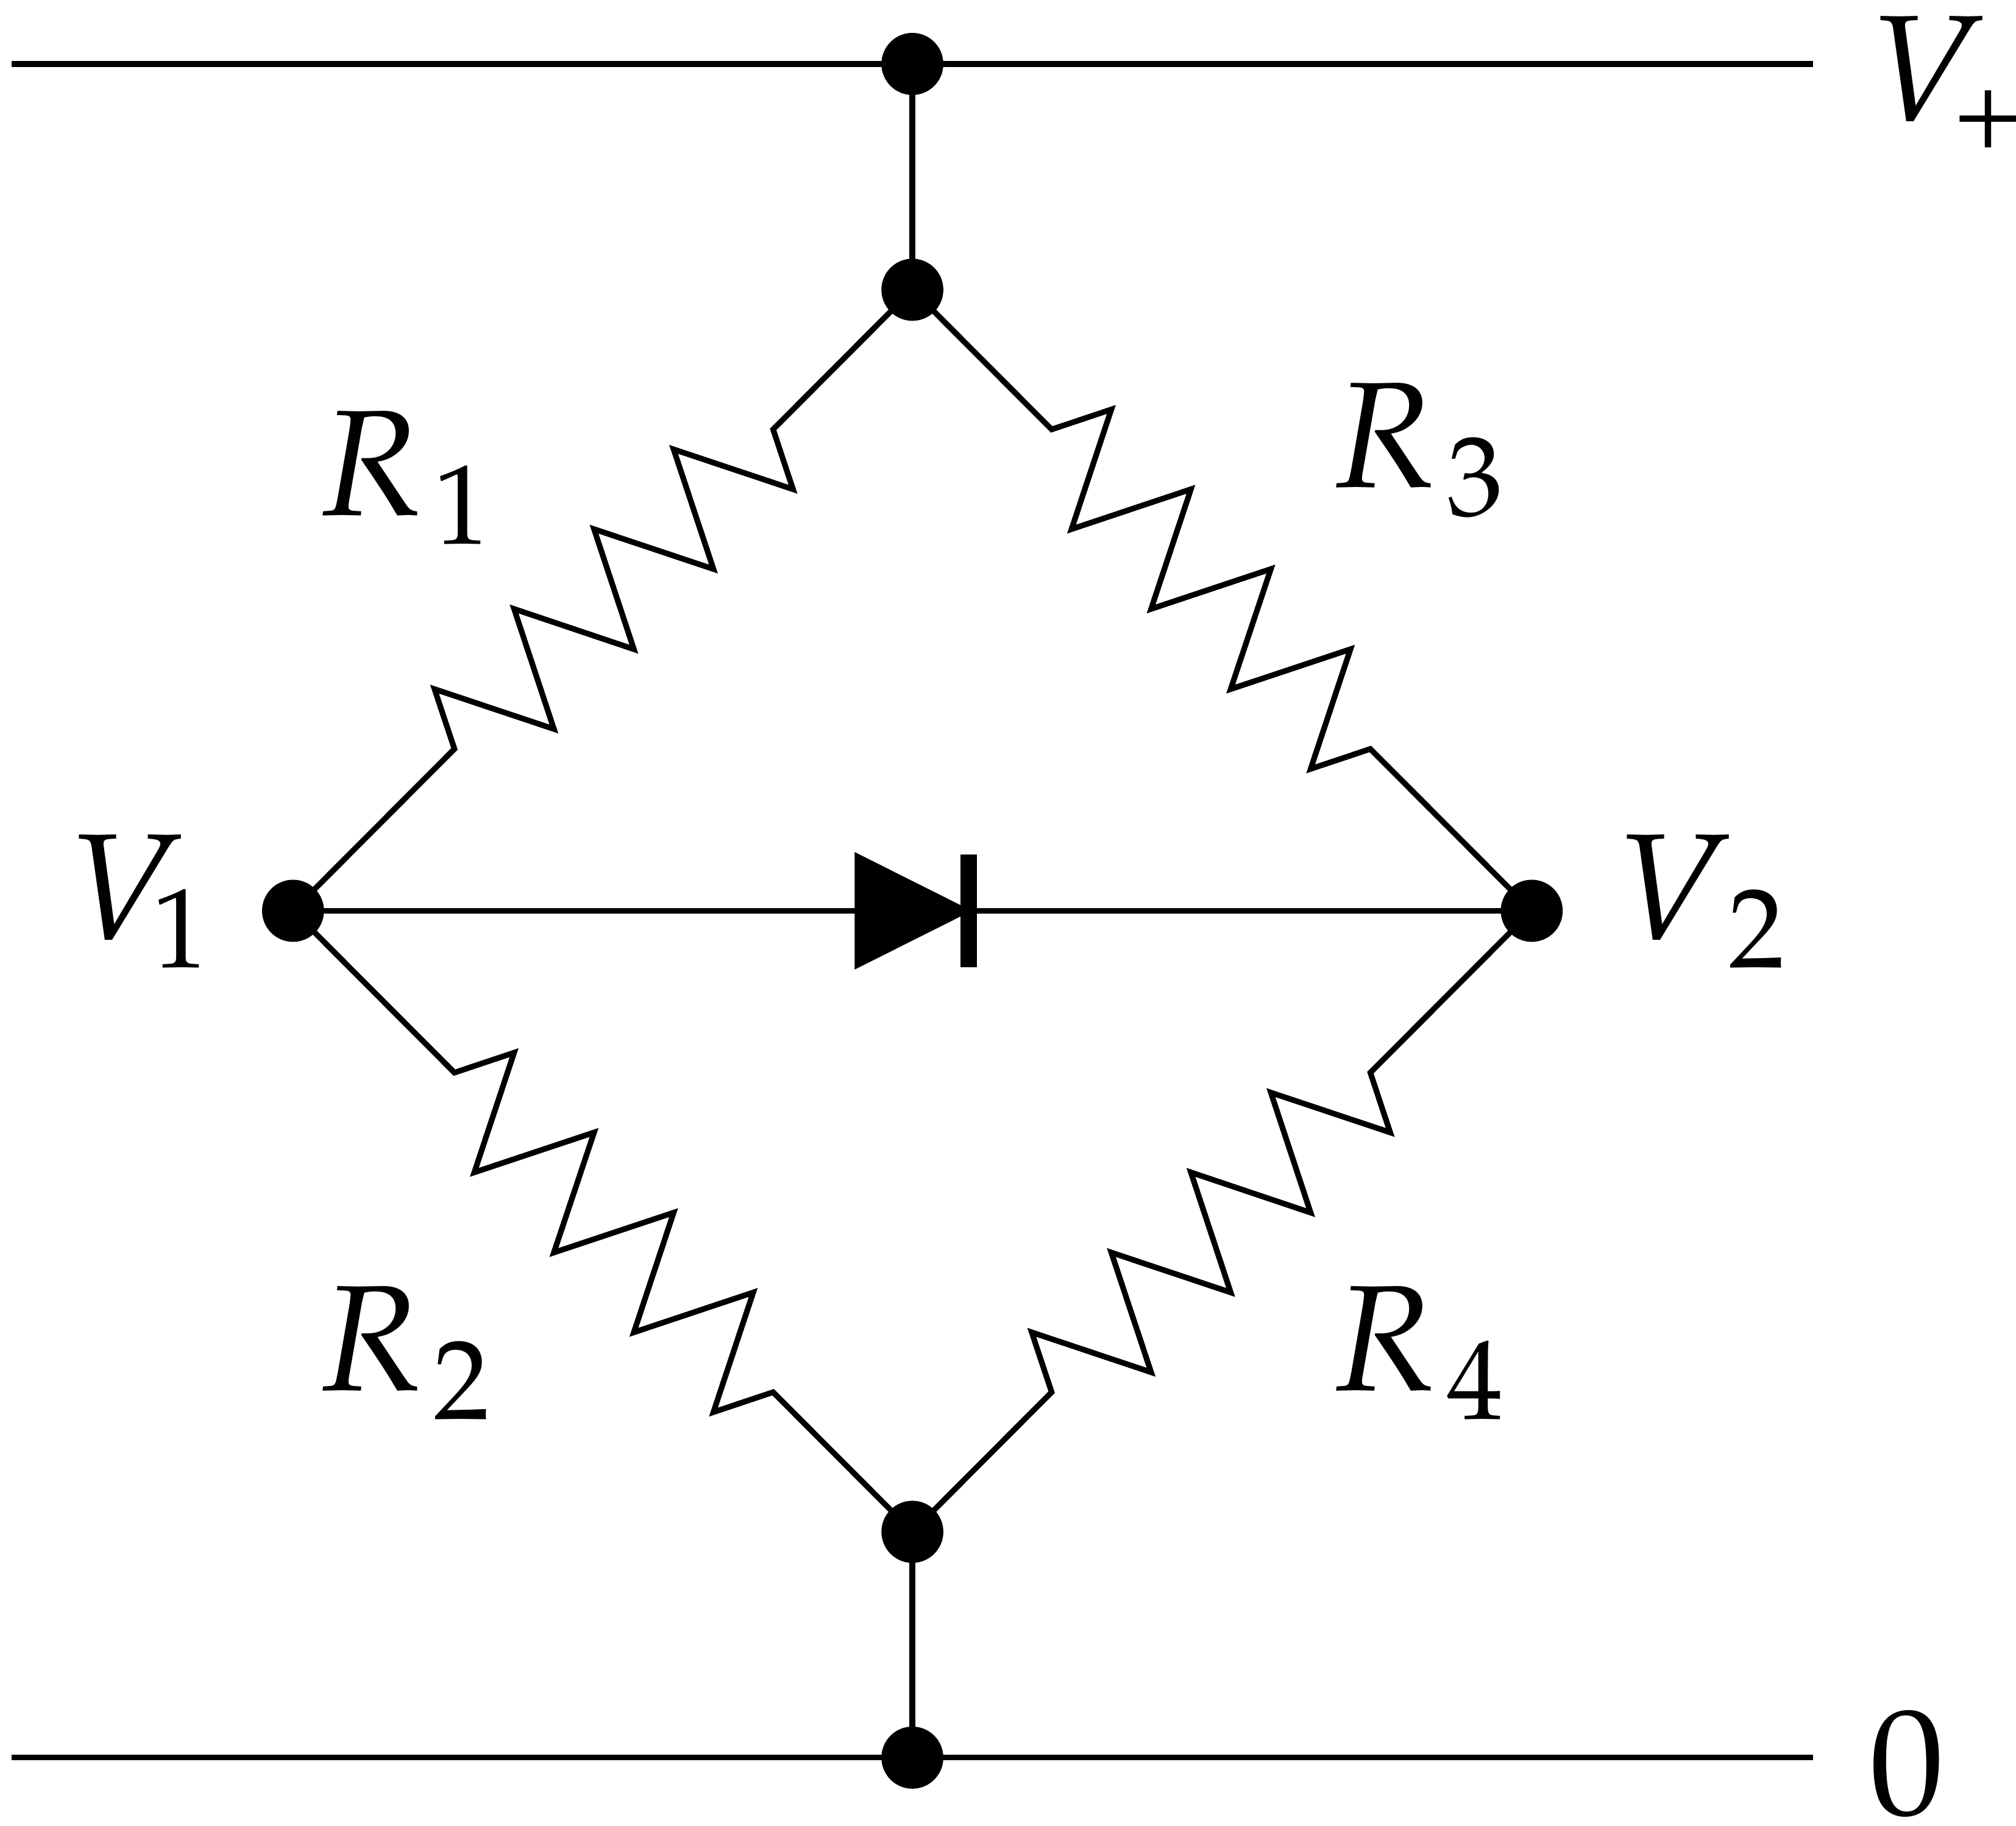

In [4]:
from IPython.display import Image,display
display(Image("non-linear-circuit.png",width=600,height=600))

1. Aplicando la ley de conservación de la corriente de Kirchhoff (dado cualquier nodo, la corriente que entra debe ser igual a la que sale), obtener las ecuaciones que han de cumplir los potenciales $V_1$ y $V_2$.

2. Usando el método de Newton-Raphson obtener el valor de $V_1$ e $V_2$ usando los valores:

$$V_+=5\;\text{V},\;R_1= 1\;\text{k}\Omega,\;R_2 =4\;\text{k}\Omega,\;R_3 =3\;\text{k}\Omega,\;R_4 =2\;\text{k}\Omega,\;I_0 =3\;\text{nA},\;V_T =0.005\;\text{V}.$$

3. Comprobar que la diferencia de voltaje entre el diodo es aproximadamente 0.6 V, que es la regla general aplicada por los ingenieros electrónicos. 

## 5.4 Máximos y Mínimos de Funciones: Minimización.

- La busqueda de mínimos aparece en Física continuamente: 

    - soluciones de equilibrio, 
    - mínimos del potencial, 
    - problemas variacionales, 
    - estado fundamental de la función de ondas de un sistema físico en Mecánica Cuántica,
    - sistemas de ecuaciones con más datos que parámetros.
    - cálculo de cotas inferiores o superirores.
    
    
- Minimización de funciones de una variable $f(x)$ o de varias variables $f(x_1,x_2,\cdots)$.

- Mínimos globales: el mínimo de la función en todo su dominio.
- Mínimos locales: un punto en el que la función toma un valor más pequeño que cualquiera de su entorno (posiciones de equilibrio inestable).

- Mientras que en general sólo suele haber un mínimo global, puede haber varios mínimos locales.

- Los métodos numéricos no nos dicen si es local o global.

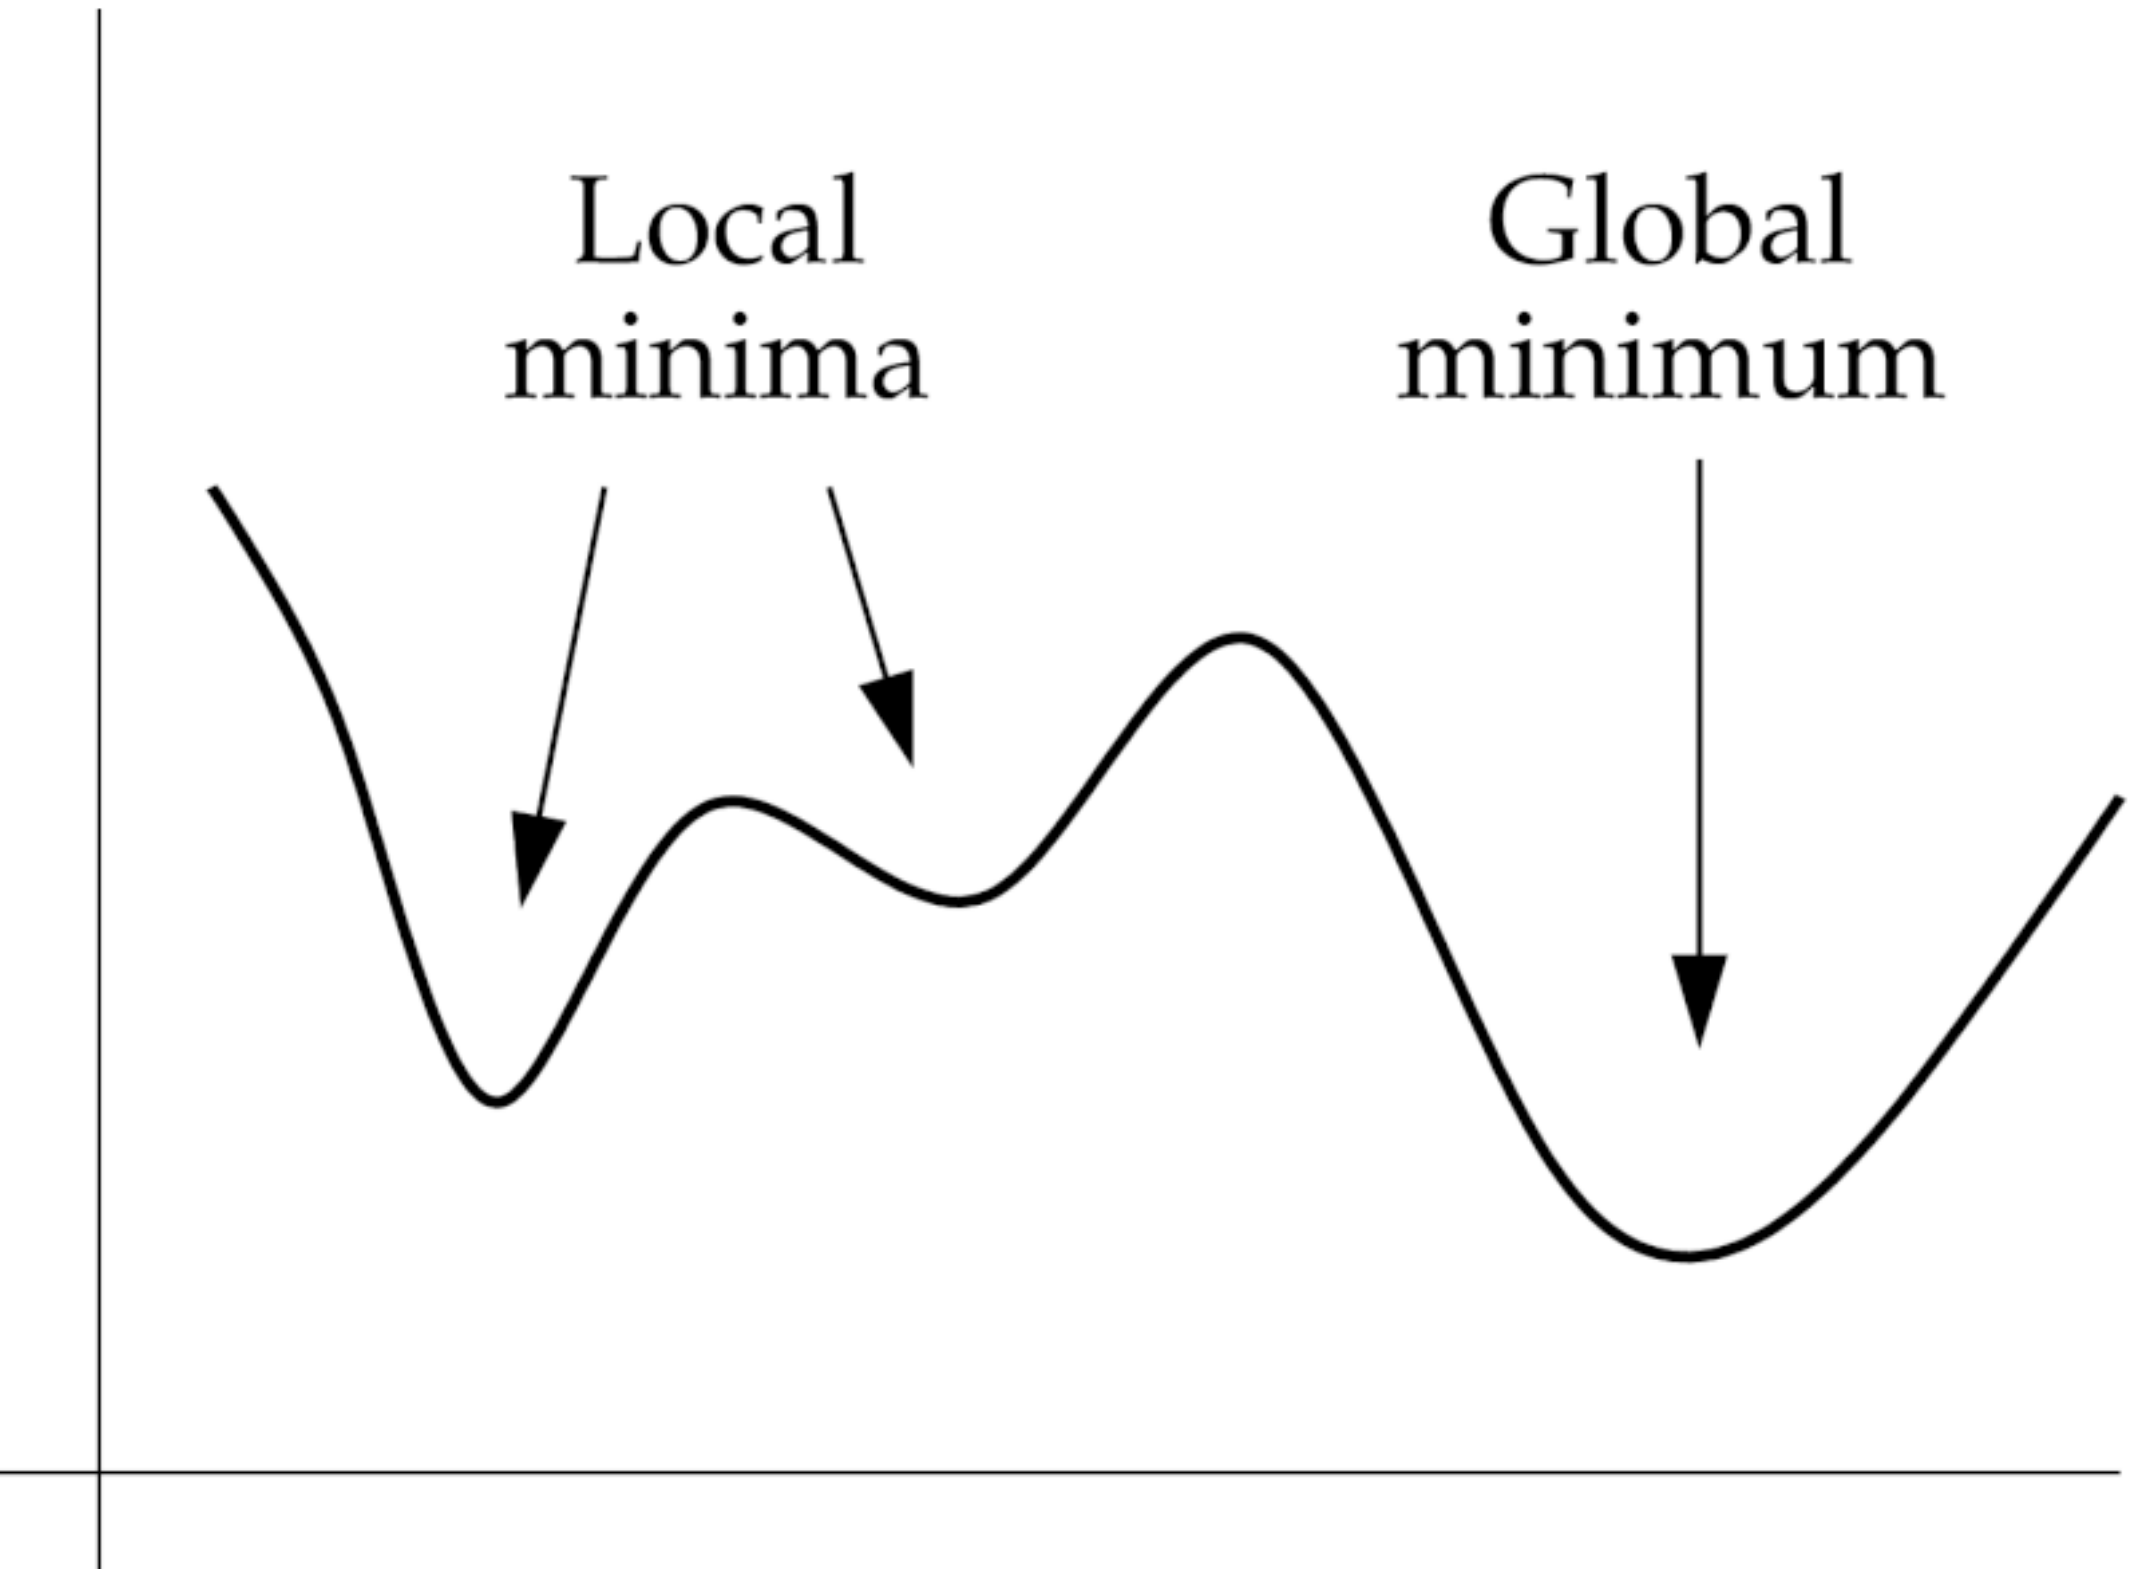

In [2]:
from IPython.display import Image,display
display(Image("minima.png",width=600,height=600))

**Estrategia general.**

- Si es posible calcular la derivada:
<br/>

     - Buscar los puntos estacionarios en los que se anulen la derivada o las derivadas parciales.  
       Si estamos buscando el mínimo de una función: $f(x_1,x_2,\cdots)$ resolvemos el sistema:
<br/>
              
       $$\frac{\partial f(x_1,x_2\cdots)}{\partial x_j}=0,\;j=1,2,\cdots$$
<br/>
                
     - Si el sistema de ecuaciones es lineal aplicamos la factorización LU o los métodos iterativos que hemos visto en la sección 5.1.  
     - Si es un sistema  no-lineal podemos utilizar el método del punto fijo/relajación o el método de Newton-Raphson.   
     La aplicación del método de Newton-Raphson a la búsqueda de mínimos se llama método de Gauss-Newton.
     
     
- Si no es posible calcular la derivada, es necesario buscar el mínimo con métodos númericos.     

### 5.4.1 Método de la razón áurea. 


- Es análoga al método de la bisección pero para la búsqueda de mínimos.


- Sólo sirve para funciones de una variable: buscamos los mínimos de $f(x)$.


- Al igual que el método de la bisección, requiere partir de dos valores de la variable $x$ que contengan el mínimo.


- La situación que consideramos es la siguiente:


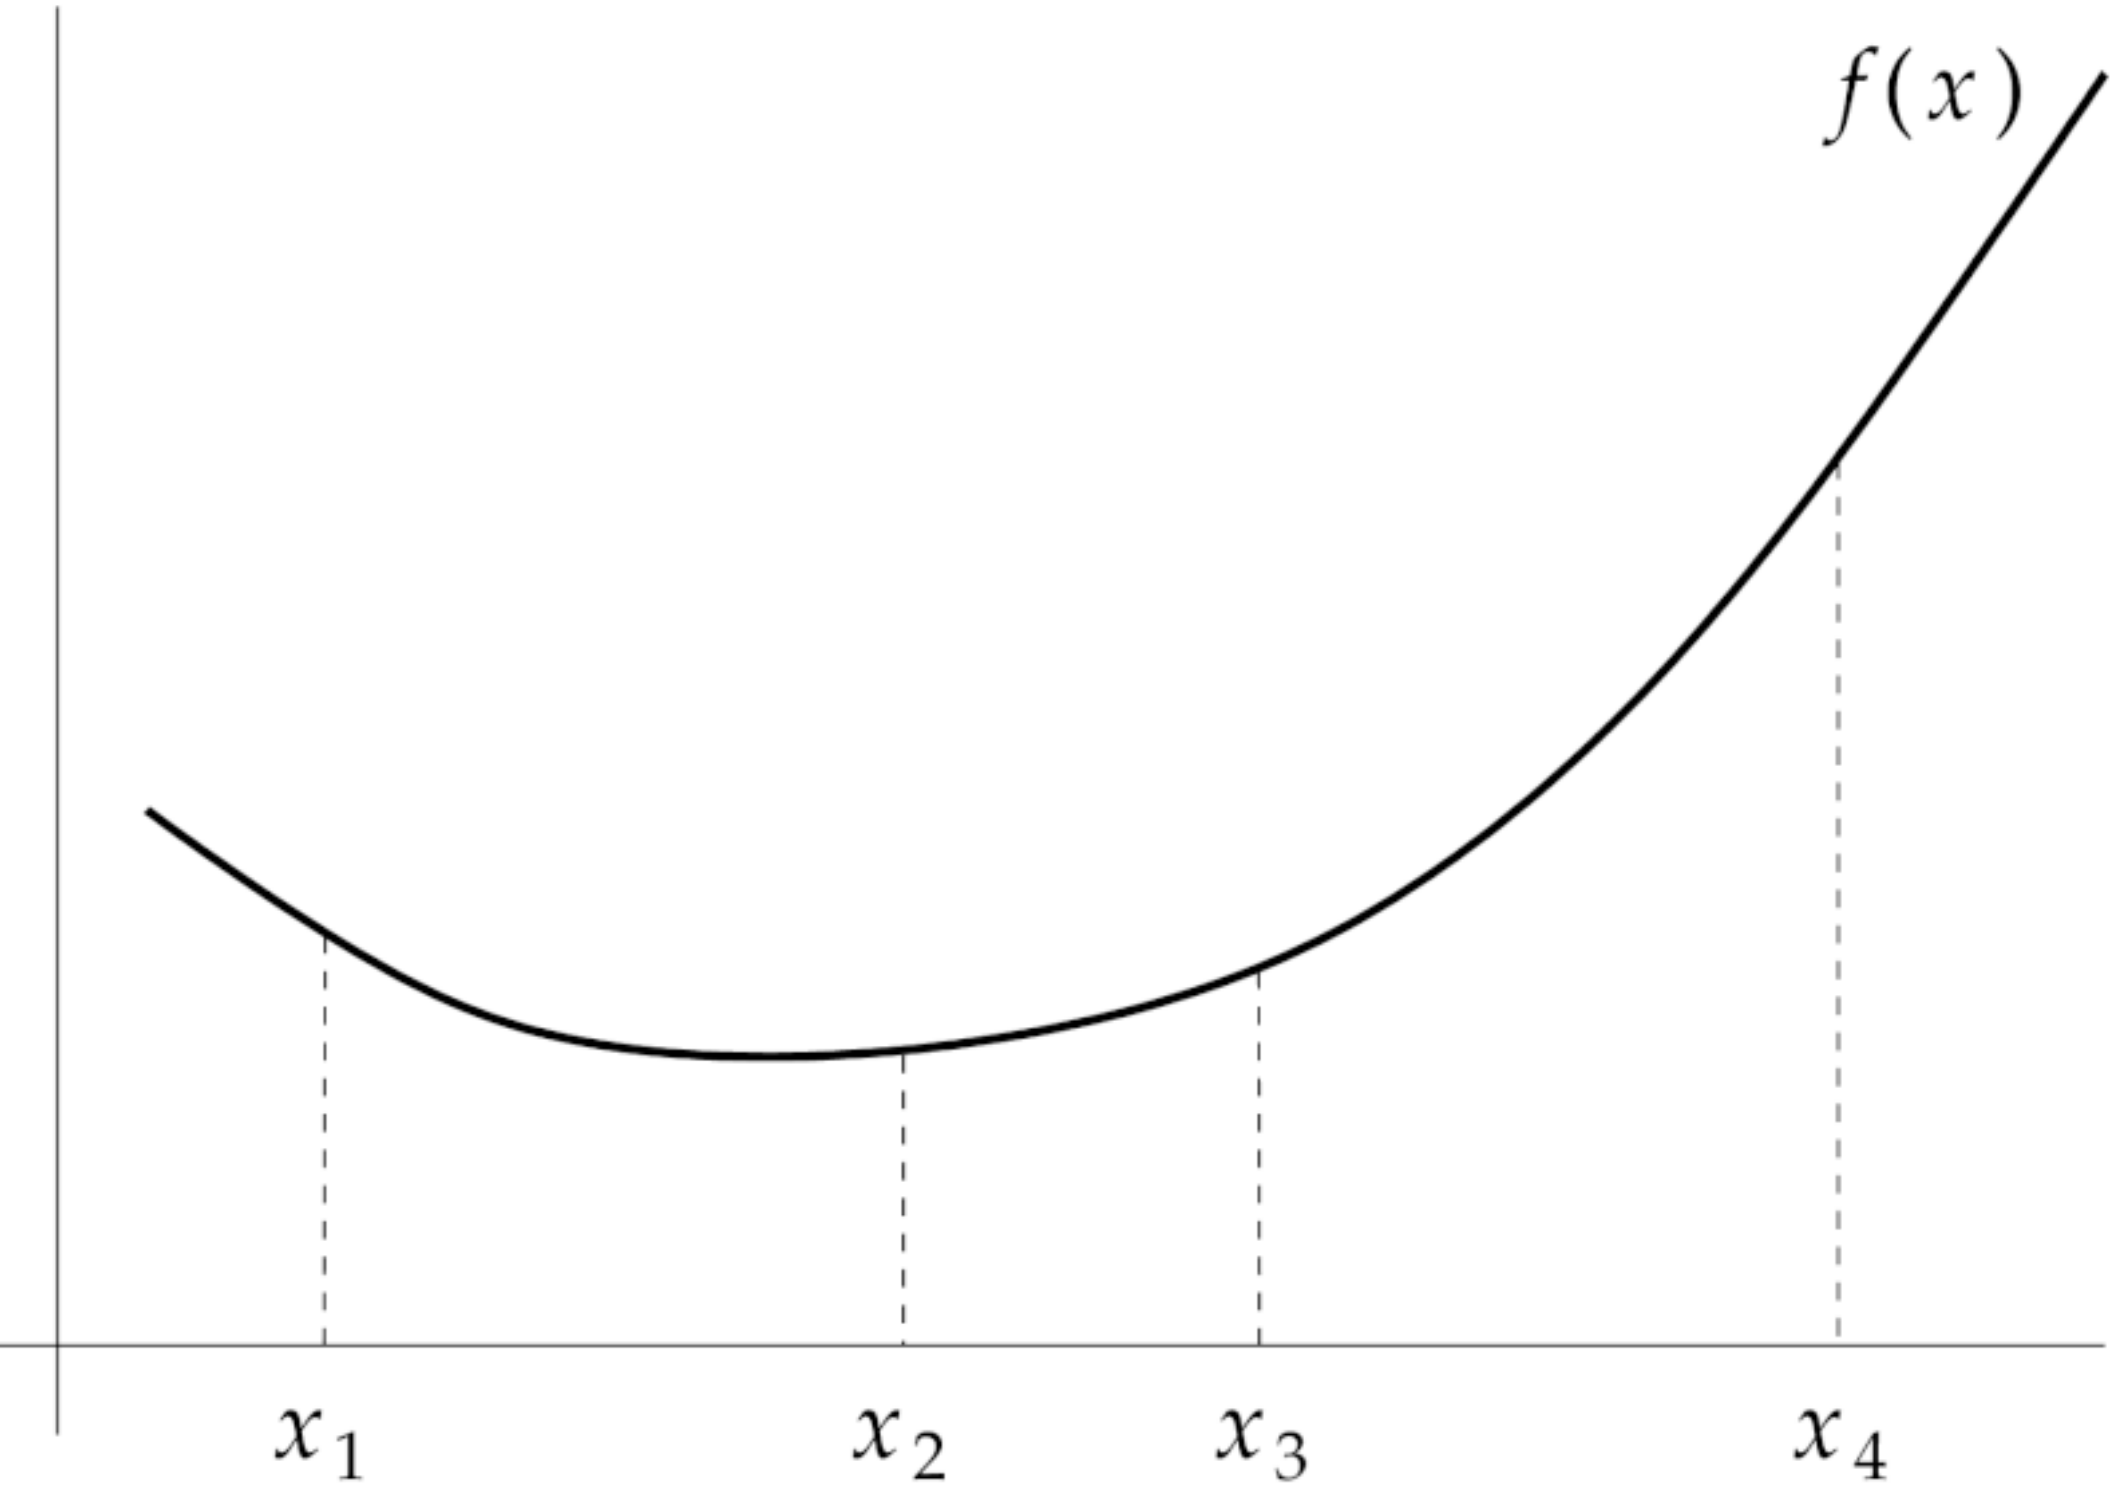

In [3]:
display(Image("golden.png",width=600,height=600))

1. Partiendo de las estimaciones inciales $x_1$ y $x_4$, asumimos que el mínimo de la función $f(x)$ esta contenido en el intervalo $[x_1,x_4]$. 
2. Seleccionamos dos puntos $x_2$ y $x_3$ interiores en el intervalo $[x_1,x_4]$.
3. Si la función en al menos uno de ellos $f(x_2)$ o $f(x_3)$ es menor que en $f(x_1)$ y $f(x_4)$, entonces podemos asumir que como mínimo hay un mínimo de la función (local o global). 

    - Si $f(x_2)< f(x_3)$ entonces el mínimo estará en el intervalo $[x_1,x_3]$.
    - Si $f(x_2) > f(x_3)$ entonces el mínimo estará en el intervalo $[x_2,x_4]$.
    
   Esto nos permite reducir el intervalo en el que se encuentra el mínimo y eligiendo un punto adicional,  podemos repetir el proceso iterativamente. 
   
   
4. El problema reside en optimizar la posición de los puntos $x_2$ y $x_3$.


**Optimizando la posición de los puntos interiores.** 

1.  como no sabemos en que lado del intervalo $[x_1,x_4]$ se encuentra el mínimo, $x_2$ y $x_3$ deben estar distribuidos simetricamente:

$$x_2-x_1 =x_4-x_3.$$

2. Si $x_2$ y $x_3$ se encuentran muy cerca del centro del intervalo $[x_1,x_4]$, el intervalo de la siguiente iteracción $[x_1,x_3]$ o $[x_2,x_4]$ será más grande.    
   Definimos el cociente entre los intervalos en dos iteracciones consecutivas:

\begin{align}
   z=&\frac{x_4-x_1}{x_3-x_1}=\frac{x_2-x_1+x_3-x_1}{x_3-x_1}=\frac{x_2-x_1}{x_3-x_1}+1,\quad\text{si}\; f(x_2)<f(x_3),\nonumber\\
   z=&\frac{x_4-x_1}{x_4-x_2}=\frac{x_4-x_2+x_4-x_3}{x_4-x_2}=\frac{x_4-x_3}{x_4-x_2}+1,\quad\text{si}\; f(x_2)>f(x_3),\nonumber\\
\end{align}

3. Volviendo a definir el mismo cociente en la siguiente iteracción (asumiendo que la función en el nuevo punto a introducir es más pequeño):

\begin{align}
   z'=&\frac{x_3-x_1}{x_2-x_1},\quad\text{si}\; f(x_2)<f(x_3),\nonumber\\
   z'=&\frac{x_4-x_2}{x_4-x_3},\quad\text{si}\; f(x_2)>f(x_3),\nonumber\\
\end{align}

$\quad$ Si queremos que el algoritmo sea igual de eficiente en dos iteraciones sucesivas entonces, debemos imponer que $z=z'$ que implica que

$$z^2-z-1=0,$$

$\quad$ como z>1 sólo podemos coger la solución positiva que implica que:

$$z=\frac{1+\sqrt 5}{2}=1.618...$$

$\quad$ que es la razón aúrea. 

4. Una vez que tenemos el valor de $z$ podemos obtener univocamente el valor de los puntos interiores:

$$x_2=x_4-\frac{x_4-x_1}{z},\quad x_3=x_1+\frac{x_4-x_1}{z}$$


**Algoritmo del método de la razón áurea.**

1. Escogemos una precisión para la obtención del mínimo.


2. Escogemos dos puntos en los extremos del intervalo en el que vamos a buscar el mínimo $x_1$ y $x_4$.

    - Calculamos los puntos del interior $x_2$ y $x_3$ con la regla da la razón aurea.
    - Evaluamos $f(x)$ en los cuatro puntos y comprobamos que al menos uno de los valores de la función en $x_2$ o $x_3$ es menor que en $x_1$ y $x_4$.
    
    
3. Si $f(x_2)<f(x_3)$ entonces el mínimo esta entre $x_1$ y $x_3$, en este caso $x_3$ se transforma en el nuevo $x_4$, $x_2$ se transforma en el nuevo $x_3$ y habrá un nuevo $x_2$ , obtenido por la regla de la razón aurea. Evaluamos $f(x)$ en este nuevo punto.


3. En caso contrario, el mínimo esta entre $x_2$ y $x_4$, entonces $x_2$ se convierte en el nuevo $x_1$, $x_3$ se convierte en el nuevo $x_2$, y habrá un nuevo $x_3$ elegido con la regla de la razón aurea. Evaluamos $f(x)$ en este nuevo punto.


4. Si $x_4−x_1$ es mayor que la precisión requerida, repetimos desde el paso 3.   
   En caso contrario, calculamos $\frac{1}{2}(x_2+x_3)$ y esta será nuestra etimación final de la posición del mínimo.
  





**Limitaciones del método de la razón áurea**

Sufre problemas similares a los del método de la bisección:

- Necistamos conocer un intervalo que contenga el mínmo.  
  Es necesario conocer/hacer uso las propiedades generales de la función permite estimar este intervalo.
- No se puede generalizar a funciones de varias variables.


**Ejercicio 5.28: el potencial de Buckingham**

El potencial de Buckingham es una representación aproximada de la energía de interacción entre los átomos de un sólido ó gas como función de la distancia r entre ellos:

$$V(r)=V_0\left[\left(\frac{\sigma}{r}\right)^6-\text{e}^{-r/\sigma}\right],$$

El potencial contiene dos términos: 

1. Uno positivo correspondiente a una fuerza repulsiva de corta distancia.
2. Otro negativo, que describe la fuerza atractiva de larga distancia. 

Eso implica que hay un punto intermedio en el que el potencial tendrá un mínimo. El valor de $r$ asociado a ese mínimo corresponderá por tanto a la distancia en reposo entre los átomos del sólido o gas. 
El valor de este mínimo sólo se puede obtener numericamente. 

Usar el método de la razón áurea para encontrar el mínimo del potencial de Buckingham para un sólido con $\sigma=1$ nm.


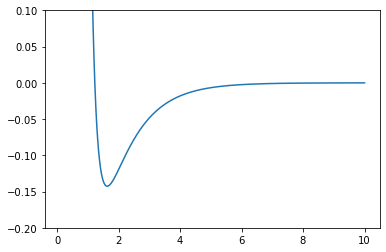

In [1]:
# 1- Constantes del problema

from numpy import exp,sqrt,linspace
from matplotlib.pyplot import plot,show,ylim

sigma=1.0           # Valor de sigma en nm
eps=1e-6            # precisión objetivo
z = (1+sqrt(5))/2   # razón áurea

# 2. definimos nuestro potencial normalizado (el mínimo no depende de V0)

def f(r):
    return (sigma/r)**6-exp(-r/sigma)

# 3. Lo representamos para estimar el intervalo

x = linspace(0.1,10,1000)
ylim(-0.2,0.1)
plot(x,f(x))
show()

El mínimo cae en 1.630516067174875 nm


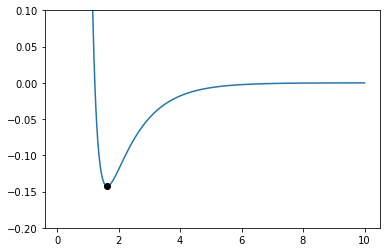

In [4]:
# 4. Posición incial de nuestros puntos, y valor de la función en ellos

x1=sigma/10
x4=sigma*10
x2=x4-(x4-x1)/z
x3=x1+(x4-x1)/z

f1=f(x1)
f2=f(x2)
f3=f(x3)
f4=f(x4)

# 5. Aplicamos el algoritmo de la razón áurea para acortar el intervalo

while x4-x1>eps:
    if f2<f3:
        x4,f4=x3,f3
        x3,f3=x2,f2
        x2=x4-(x4-x1)/z
        f2=f(x2)
    else:
        x1,f1=x2,f2
        x2,f2=x3,f3
        x3=x1+(x4-x1)/z
        f3=f(x3)

xmin=(x1+x4)/2
print("El mínimo cae en",0.5*(x1+x4),"nm")

plot(x,f(x))
plot(xmin,f(xmin),"ko")
ylim(-0.2,0.1)
show()

**Ejercicio 5.29: la temperatura de una bombilla**

Tradicionalmente, una bombilla esta formada por un filamente de tungsteno, que se calienta cuando la corriente eléctrica pasa por él, emitiendo radiación térmica. 
Esencialmente toda la energía consumida es radiada electromagnéticamente, pero una parte de esa radiación no es emitida en el espectro visible. 


Definamos la eficiencia de una bombilla como la energía radiada en el visible entre la total. 
Asumiendo que un filamento de tungsteno cumple la ley de Plack, la potencia radiada por unidad de longitud de onda viene dada por:

$$I(\lambda)=2\pi A hc^2\frac{\lambda^{-5}}{\text{e}^{hc/\lambda k_B\,T}-1},$$

siendo $A$ la superficia del área del filamento de tungsteno, $h$ la constante de Planck, c la velocidad de la luz, $k_B$ la constante de Bolzamann. 

Teniendo en cuenta que radiación visible se encuentra entre las longitudes de onda $\lambda_1=390$ nm y $\lambda_2=750$ nm.

1. Llamando $\displaystyle x=x(\lambda)=\frac{hc}{\lambda k_B T},$ y $x_i=x(\lambda_i)$ con $i=1,2$, 
probar que la eficiencia de una bombilla de tungsteno $\eta$ viene dada por la integral:

$$\eta=\displaystyle\frac{\int_{x_1}^{x_2}{x^3/(\text{e}^x-1)\,\text{d}x}}{\int_{0}^{\infty}{x^3/(\text{e}^x-1)\,\text{d}x}}=\frac{15}{\pi^4}\int_{x_1}^{x_2}{\frac{x^3}{(\text{e}^x-1)}\text{d}x},$$

$\quad$ donde en el último paso hemos hecho uso de que la integral del denominador se conoce analíticamente.

2. Escribir un programa que tome la temperatura como argumento y que calcule el valor de $\eta$ para dicho valor.   
   Como la integral no se puede resolver analiticamente, usar el método más conveniente para integrarla numericamente.   
   Representar la eficiencia de la bombilla para temperaturas entre $300$ K y $10000$ K.  
   Comprobar que hay una temperatura intermedia para la que la eficiencia es máxima.


3. Calcular la temperatura que corresponde al máximo de la eficiencia con una precisión de 1 K usando la razón áurea. 


4. ¿Tiene sentido practico calentar el tungsteno a la temperatura del máximo?.

### 5.4.2 El método de Gauss-Newton. 

- El método de la razón áurea es rápido y robusto, sin embargo:
<br/>

     - Requiere empezar por un intervalo que contenga al máximo.
     - No se puede generalizar a más de una variable.
     
     
- Sin embargo un método de minimización consiste en encontrar solución de la ecuación:

    $$f'(x)=0,$$
    
$\quad$ en el caso de una variable, y de forma similar para más de una variable.  

- Solucioń que se puede encontrar usando el método de Newton-Raphson, que aplicado a la derivada se llama método de Gauss-Newton. 

- Dada una estimación inicial $x$ la siguiente vendrá dada por:

$$x'=x-\frac{f'(x)}{f''(x)},$$

- Si conocemos la función y sus derivadas, el método nos permite encontrar los máximos y mínimos de una función de forma rápida y fiable. 

- El método de Gauss-Newton converge de forma cuadrática y puede generalizarse a varias variables. 


- Sin embargo es bastante común que la primera y/o la segunda derivada no sean conocidas.   
  En ese caso estás se pueden aproximar usando los métodos de la diferencias finitas del Tema 3. 
  
- Da lugar a un método de la secante para un problema de minimización.  

### 5.4.3 El método del gradiente descendente.

- El método del gradiente descendente es una modificación del método de Gauss-Newton para el caso en que la segunda derivada no se puede calcular ni aproximar correctamente.

- En ese caso, se aproxima por una constante $\gamma$ que debe tener el orden de magnitud correcto de forma que:

$$x'=x-\gamma\,f'(x).$$

- El valor de $\gamma$ no tiene que estar determinado muy precisamente, es suficiente con que el orden de magnitud sea correcto.  

- Si $\gamma$ tiene signo positivo el método le sustraerá el valor de la derivada $\gamma$ veces a nuestra estimacioń $x$, y el método convergerá hacía un mínimo. 
- Si $\gamma$ tiene signo negativo, el método le añadirá dicho valor, y convergerá a un máximo.

- Si $\gamma$ es grande podemos converger más rápidamente, pero si lo es demasiado pasaremos por encima del mínimo y el método fallará.

- El valor de $\gamma$ tiene que ser optimizado para maximizar la convergencia sin saltarnos en ningún momento el máximo.  
  Para ello, el método más rápido es probar con varios valores hasta encontrar el valor más óptimo.
  
  
- Si la primera derivada tampoco se puede calcular, se estima una vez más numericamente:

$$f'(x)=\simeq \frac{f(x_2)-f(x_1)}{x_2-x_1},$$

$\quad$ por lo que la siguiente estimación vendrá dada por

$$x_3=x_2-\gamma\frac{f(x_2)-f(x_1)}{x_2-x_1}$$

### 5.4.4 Mínimos y máximos en varias dimensiones.

- Los algoritmos de busqueda de mínimos (optimización) en varias dimensiones usan una misma idea básica: 

    1. Dada una estimación inicial $X_0=\left(x^1_0,x^2_0,\cdots\right)$, encontramos una dirección $D_0$ a lo largo de la cual el valor de $f\left(X_0\right)=f\left(x^1_0,x^2_0,\cdots\right)$ decrece.
    2. Después, buscamos el menor valor de $f\left(X\right)$ en esa dirección empezando en $X_0$.   
       Esto hace que el problema sea equivalente a uno unidimensional: 
       
       Hay que minimizar la función:
       
       $$f\left(X_0+\alpha\,D_0\right),\quad \alpha>0,$$
       
       Esta optimización unidimensional se denomina busqueda lineal y el valor de $α$ que minimiza $f\left(X_0+\alpha\,D_0\right)$,  $\alpha_0$, se denomina longitud de paso.
<br/>
    3. Una vez se ha encontrado $α_0$ tenemos una nueva estimación:
    
        $$X_1= X_0 +\alpha_0 D_0$$
    
     el proceso se repite de nuevo empezando por el punto 1 generando una secuencia de iteracciones:
          
         $$X_{k+1}= X_{k} +\alpha_k D_k.$$

- La virtud de estos métodos es que remplazan el problema $n$-dimensional inicial por una secuencia de problemas unidimensionales, más sencillos.


#### Método de máxima pendiente

El problema por tanto se resume en encontra la dirección en la que la función decrece.

- Si podemos calcular las derivadas parciales de la función, la dirección en que la función varia más rapidamente viene dada por el gradiente.  

- De esa forma el método consiste en tomar:

$$D_k=-\left.\nabla f(X)\right\vert_{X=X_k},$$


- El método se puede generalizar trivialmente para encontrar máximos y mínimos en sistemas de ecuaciones lineales o no lineales.

#### Método del gradiente conjugado.

- Es una mejora del método de máxima pendiente. En esta caso la dirección de cambio se elige como:

$$D_k=-\left.\nabla f(X)\right\vert_{X=X_k}+\beta_k\,D_{k-1},$$

$\quad$ donde:

$$\beta_k=\frac{\left.\nabla f(X)^T\nabla f(x)\,\right\vert_{X_k}}{\left.\nabla f(X)^T\nabla f(x)\,\right\vert_{X_{k-1}}},$$

- De esta forma las direcciones elegidas en cada iteracción son conjugadas con respecto a la matriz Hessiana de $f(x)$:

$$D_k^T\cdot H(X)\vert_{X_K}\cdot D_{k-1}=0.$$


- Que implica que lo que bajamos en una dirección no lo deshacemos en las siguientes.


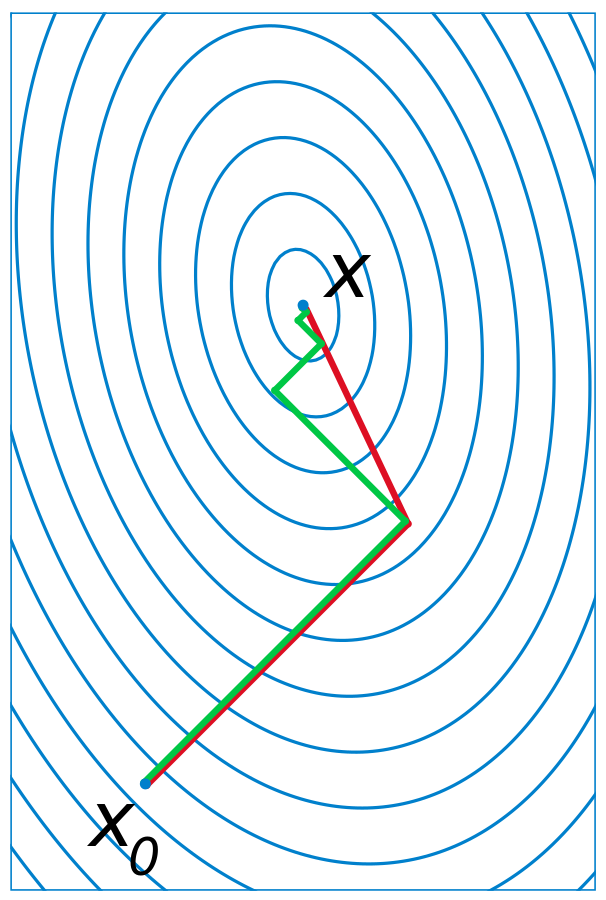

In [17]:
from IPython.display import display,Image
display(Image("Conjugate_gradient.png",width=400))

El paquete scipy en su módulo optimize proporciona la función minimize donde se pueden escoger diferentes método más avanzados:

   - Método de Brendt.
   - Método de Nelder–Mead.
   - Método de Powell.
   - Metodo BFGS.

    
https://docs.scipy.org/doc/scipy/reference/optimize.html    

**Final del Tema 5**